# 1.1 
## Test del generatore di numeri casuali
## Spiegazione programma   1_1.cpp
Il programma inizia con la lettura degli input dal file "**1_1.in**", poi ci sono "two nested do loops", il primo ciclo sui blocchi e il secondo sugli step interni al blocco.  
A ogni passo del blocco c'è l'accumulo delle proprietà attraverso la funzione "**Accumulate**", alla fine di ogni blocco le proprietà vengono scritte usando la function "**Averages**".  
Il programma fornisce 3 file di output:
- "**1_1r.out**", dove si stima $<r>$
- "**1_1var.out**", dove si stima $<(r - \frac{1}{2})^2>$
- "**1_1chi.out**", dove si stima $\chi^2$

Per compilare usare il Makefile. 

In [1]:
#Plotting script
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

nblk = 150
nstep = 10000
M = 100

ave = np.zeros(nblk)    #Media di blocco
err = np.zeros(nblk)    #Quadrato della media di blocco
file_data2 = np.loadtxt('1_1r.out', usecols=(2,3))
ave = file_data2[:,0]
err = file_data2[:,1]

x = np.arange(nblk)
"""
plt.errorbar(x,ave- 0.5,yerr=err)
#plt.title()
plt.xlim([0,150])
plt.ylabel('<(r-0.5)>')
plt.xlabel('blocco')
plt.grid(True)
#plt.savefig('./Pictures/<(r-0.5)>.png', dpi=300)
plt.show()
"""

"\nplt.errorbar(x,ave- 0.5,yerr=err)\n#plt.title()\nplt.xlim([0,150])\nplt.ylabel('<(r-0.5)>')\nplt.xlabel('blocco')\nplt.grid(True)\n#plt.savefig('./Pictures/<(r-0.5)>.png', dpi=300)\nplt.show()\n"

## Stima di $<r>$
<img src="./Pictures/<(r-0.5)>.png" alt="Drawing" style="width: 500px;"/>  
Lunghezza di blocco = 10000  
Il grafico sopra rappresenta la media cumulativa di $<r>$ in funzione del numero di blocco, inizialmente è compatibile con il valore vero per $2 \sigma$, dopo 30 blocchi risulta compatibile in una $\sigma$.  
<img src="./Pictures/<(r-0.5)^2>.png" alt="Drawing" style="width: 500px;"/>
Lunghezza di blocco = 10000  
Il grafico sopra rappresenta la media cumulativa di $<r>$ in funzione del numero di blocco, inizialmente è compatibile con il valore vero per $2 \sigma$, dopo circa 70 blocchi risulta compatibile in un $\sigma$.
<img src="./Pictures/Chi.png" alt="Drawing" style="width: 500px;"/>
La $\chi$ assume la maggior parte dei valori nell'intervallo $[80,120]$, dato che mi aspetto che $\chi$ sia circa 100, posso concludere che l'ipotesi (che il generatore sia un generatore di numeri casuali) non è stata rigettata.

Tutte e tre i grafici confermano che stiamo utilizzando un generatore di numeri casuali.

# 1.2
## Verifica del Teorema del Limite Centrale
## Spiegazione programma 1_2.cpp
All'interno del main vengono chiamate tre funzioni:
- Input: Inizializza random number.
- Sample: Campiona la distribuzione uniforme tra 0 e 1, esponenziale e di Cauchy-Lorentz.
- S: Calcola $S_N = \frac{1}{N} \sum_{i=1}^{N} x_i $ (con N =1,2,10,100) e lo scrive su file.  
I file di output sono 4:  
- "**S_1**" 
- "**S_2**"
- "**S_10**"
- "**S_100**"  
Le prime $10^4$ righe di ogni file si riferiscono alla distribuzione uniforme tra 0 e 1, le successive $10^4$ alla esponenziale e le ultime $10^4$ alla distribuzione di Cauchy-Lorentz.


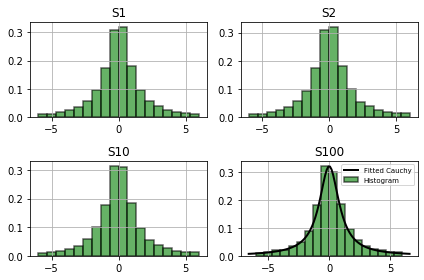

In [5]:
# Plotting script
from scipy.stats import norm
from scipy.stats import cauchy

N = 10000
bin =   [-6,    -5.3334,    -4.6668,    -4.0002,    -3.3336,    -2.667,    -2.0004,   -1.3338,   -0.6672,    -0.0006,    0.666,    1.3326,    1.9992,    2.6658,    3.3324,    3.999,    4.6656,    5.3322,    5.9988]  
file_data1 = np.loadtxt('S_1', usecols=(0))
file_data2 = np.loadtxt('S_2', usecols=(0))
file_data10 = np.loadtxt('S_10', usecols=(0))
file_data100 = np.loadtxt('S_100', usecols=(0))
S1 = np.zeros(N)
S2 = np.zeros(N)
S10 = np.zeros(N)
S100 = np.zeros(N)

for i in range(N):
    S1[i] = file_data1[i+N+N]
    S2[i] = file_data2[i+N+N]
    S10[i] = file_data10[i+N+N]
    S100[i] = file_data100[i+N+N]
    
plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(S1, bins= bin, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.5)
axs[0, 0].set_title('S1')
axs[0, 1].hist(S2, bins= bin, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.5)
axs[0, 1].set_title('S2')
axs[1, 0].hist(S10, bins= bin, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.5)
axs[1, 0].set_title('S10')
axs[1, 1].hist(S100, bins= bin, density=True, alpha=0.6, color='g',edgecolor='black', linewidth=1.5)
axs[1, 1].set_title('S100')

#Fit a gaussian with S100
#mu, std = norm.fit(S100)
loc, scale = cauchy.fit(S100)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
p = cauchy.pdf(x, loc, scale)
axs[1, 1].plot(x, p, 'k', linewidth=2)
axs[1, 1].legend(['Fitted Cauchy','Histogram'], loc='upper right',fontsize = 'x-small')
fig.tight_layout()

#plt.plot(x, p, 'k', linewidth=2)
#plt.savefig('./Pictures/Exp.png', dpi=300)
#plt.savefig('./Pictures/Cauchy.png', dpi=300)


## Grafici 
## Distribuzione uniforme tra 0 e 1  
<img src="./Pictures/Uniform.png" alt="Drawing" style="width:500px;"/>  
## Distribuzione esponenziale
<img src="./Pictures/Exp.png" alt="Drawing" style="width: 500px;"/>  

##  Distribuzione di Cauchy-Lorentz 

<img src="./Pictures/Cauchy.png" alt="Drawing" style="width: 500px;"/>

# 1.3
## Esperimento di Buffon
## Spiegazione programma 1_3.cpp
Il programma inizia con la lettura del file di input **"3.in"**, poi ci sono  "two nested do loops", il primo ciclo sui blocchi e il secondo sugli step interni al blocco.
A ogni step del blocco avviene il campionamento attraverso la funzione **Sample**.
<img src="./Pictures/needle.png" alt="Drawing" style="width: 500px;"/>
Viene campionata **y_c**, coordinata y del centro dell'ago, e $\teta$ con la tecnica della rejection (nel programma chiamato teta), l'angolo rispetto l'orizzontale.
Successivamente, se $y_c > \frac{l}{2} sin(\teta)$, l'ago colpisce la linea orizzontale e  c'è l'accumulo.  
Infine, le medie di blocco e cumulative vengono calcolate in **Averages** e scritte sull'unico file di output **"3Pi.out"**.

In [11]:
#Plotting script
nblk = 150

ave = np.zeros(nblk)    #Media di blocco
err = np.zeros(nblk)    #Quadrato della media di blocco
file_data2 = np.loadtxt('3Pi.out', usecols=(0,1,2,3))
ave = file_data2[:,2]
err = file_data2[:,3]

"""
x = np.arange(nblk)
p = np.pi #Pigreco
plt.errorbar(x,ave-p,yerr=err)
plt.title('$Pi$: l=0.05, d=0.1')
plt.ylabel('$\pi_{s}$ - $\pi$')
plt.xlabel('blocco')
plt.grid(True)
plt.savefig('./Pictures/Pi.png', dpi=300)
plt.show()
"""

"\nx = np.arange(nblk)\np = np.pi #Pigreco\nplt.errorbar(x,ave-p,yerr=err)\nplt.title('$Pi$: l=0.05, d=0.1')\nplt.ylabel('$\\pi_{s}$ - $\\pi$')\nplt.xlabel('blocco')\nplt.grid(True)\nplt.savefig('./Pictures/Pi.png', dpi=300)\nplt.show()\n"

<img src="./Pictures/Pi.png" alt="Drawing" style="width: 500px;"/>
Per $\pi_s$ si intende il valore stimato dal programma "3.cpp" mentre per $\pi$ il valore di pigrego nella libreria numpy.   

La lunghezza dei blocchi è di 10000.